<a href="https://colab.research.google.com/github/Karthik982018/Karthik982018/blob/main/kmeansNdKmedians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

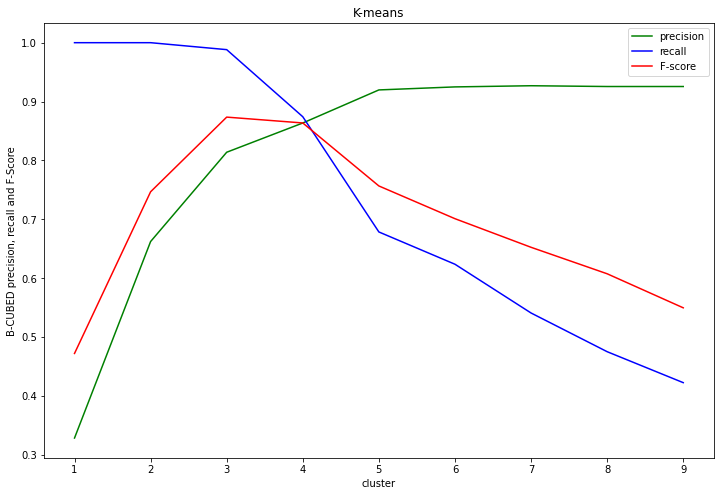

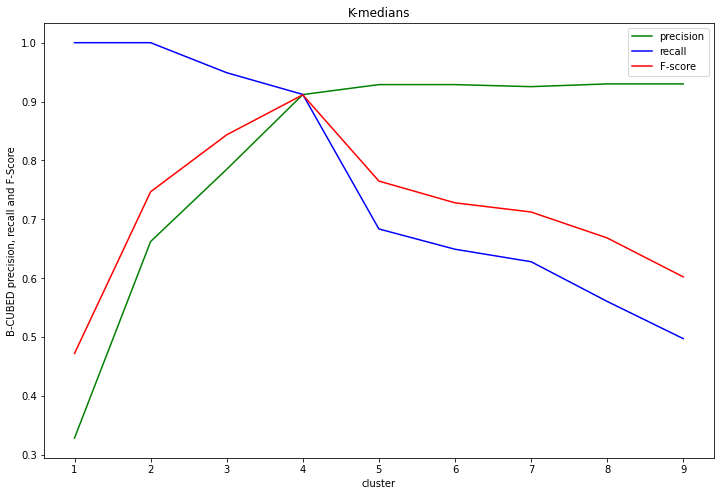

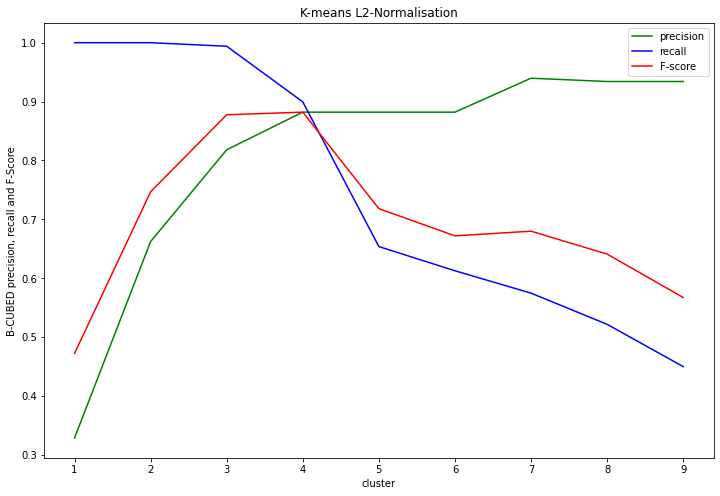

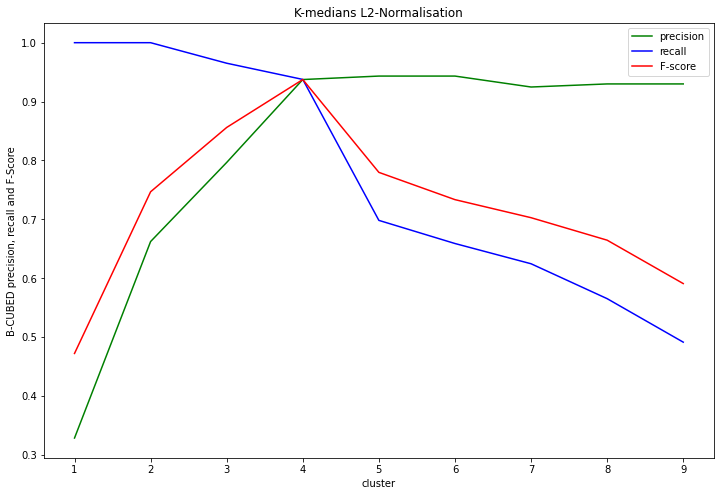

In [2]:
# importing the required librarys
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt


# reading data from the files

countries=pd.read_csv('countries',header=None,sep = " ")
fruits=pd.read_csv('fruits',header=None,sep = " ")
veggies=pd.read_csv('veggies',header=None,sep = " ")
animals=pd.read_csv('animals',header=None,sep = " ")

# changing the first element of each dataset to there respective label
animals.loc[:,0]="animals"
fruits.loc[:,0]="fruits"
veggies.loc[:,0]="veggies"
countries.loc[:,0]="countries"

# converting to a numpy array
countries.to_numpy()
fruits.to_numpy()
veggies.to_numpy()
animals.to_numpy()

# combining all the data together
dataset = np.vstack([animals,countries,fruits,veggies])
copyDataSet=deepcopy(dataset)




# clustering(centroids,data,algoChoice) takes the centroid and clusters the data acoording to the centroid chosen
def clustering(centroids,data,algoChoice):
    """
    *inputs: centroids - chosen set of centroids
             data - dataset containing all the data points
             algoChoice -  can take integer values 1 and 2 as input. 1 = k-means and 2 = k-medians
    *return: list containing the cluster id of each dataset.

    """

    # intialise the clustering list
    clusterList=np.zeros(len(data))
  
    
    # iterate through each data
    for i in range(len(data)):
      x=data[i]
      dist=[]
      for c in centroids:
        # finds the distance of each data point to all the centroids
        if algoChoice==1:
          
          d = np.linalg.norm(x-c)
        elif algoChoice==2:
          
          d=np.sum(np.abs(x - c))
        dist.append(d)

      # choose the minimum distance
      minDistIndex=np.argmin(dist)
      
      # updating the cluster list
      clusterList[i]=minDistIndex
    return clusterList

# selectNewCentroids(clusteringList,data,algoChoice) find the new centroid for each cluster according to the algorithm chosen.
def selectNewCentroids(clusteringList,data,algoChoice):
    """
    *inputs: clusteringList - clusters obtained from the previous centroids
             data - dataset containing all the data points
             algoChoice -  can take integer values 1 and 2 as input. 1 = k-means and 2 = k-medians
    *return: new set of centroids

    """
    newCentroids=[]
    
    # iterating through the number of clusters 
    for i in range(int(max(clusteringList))+1):

      
      
      clusters=[]
      # iterating through the clusterList and seperating the cluster
      for j in range(len(clusteringList)):
        
        cluster=clusteringList[j]
        if i==cluster:
          clusters.append(data[j])

      # k-means
      if algoChoice == 1:
        # euclidian distance
        newCentroids.append(np.mean(clusters,axis = 0))
      # k-medians
      elif algoChoice==2:
        # manhattan distance
        newCentroids.append(np.median(clusters,axis = 0))

      
    return newCentroids

      
# culsteringAlgo(data,k,algoChoice) implements the clustering algorithm and returns the final clusters
def culsteringAlgo(data,k,algoChoice):
    """
    *inputs: k - number of representatives
             data - dataset containing all the data points
             algoChoice -  can take integer values 1 and 2 as input. 1 = k-means and 2 = k-medians
    *return: final clusters

    """
    # choosing the initial k centroids
    np.random.seed(10)
    initCentroidsIndex = np.random.randint(data.shape[0], size = k)
    initCentroids=[]
    # to get distinct centroids
    while (len(initCentroidsIndex) > len(set(initCentroidsIndex))):
        initCentroidsIndex= np.random.randint(data.shape[0], size = k)
    for i in initCentroidsIndex:
        initCentroids.append(data[i])


    

    clusteringList=[]
    
    # repeating the algorithm step untill it is converged
    while True:


      # clustering
      clusteringList=clustering(initCentroids,data,algoChoice)

   
      # choosing the centroids
      newCentroids=selectNewCentroids(clusteringList,data,algoChoice)

      # the algorithm runs untill previous and new centroids does not change
      if np.array_equal(initCentroids,newCentroids):
        break
      # updating the centroids
      initCentroids=newCentroids
  
    return clusteringList



# l2Normal(data) applies l2 normalisation to the dataset
def l2Normal(data):
    """
    *inputs: data - the dataset containing the feature points
    *return: l2 normalised dataset
    """
    # l2 normalised dataset
    l2Dataset=[]
    for x in data:
      # euclidian distance of the feature vector
      d = np.linalg.norm(x)

      # constant for multiplying with the feaure vector so that the euclidian distance becomes a unity.
      constant=1/d
      y=constant*x

      l2Dataset.append(y)

    return np.array(l2Dataset)




# bcubed(data,k,algoChoice,l2) calculate the B-CUBED precision, recall and F-Score for the algorithm chosen
def bcubed(data,k,algoChoice,l2):
    """
    *inputs: k - number of representatives
             data - dataset containing all the data points
             algoChoice -  can take integer values 1 and 2 as input. 1 = k-means and 2 = k-medians
             l2- can take integer values 0 or 1. 1= l2- normalised and 0= unnormalised
    *return: final averaged precision, recall and F-Score for the specific k value and algorithm chosen.

    """
    # applying l2 normalisation if l2=1
    if(l2==0):
      featureData = data[:,1:]
      clusterListFinal=culsteringAlgo(featureData,k,algoChoice)
    elif(l2==1):
      featureData=l2Normal(data[:,1:])
      clusterListFinal=culsteringAlgo(featureData,k,algoChoice)



    precision=[]
    recall=[]
    fScore=[]
    # iterates through the dataset
    for i in range(len(data)):
      # ground truth of the data point chosen 
      xlabel=data[i][0]
      # cluster in which the chosen datapoint belongs to
      cluster=clusterListFinal[i]

      labelsInCluster=[]
      # interating through the dataset to find the the elements belonging to the cluster of chosen data point.
      for j in range(len(data)):
        if(cluster==clusterListFinal[j]):
          labelsInCluster.append(data[j][0])
      
      
      # number of elemnts in the cluster with the label of the chosen data point 
      noSameLabelInCluster=0

      # 
      # number of elemnts in the dataset with the label of the chosen data point 
      noSameLabelInData=0

      # length of the cluster
      noElmentsInCluster=len(labelsInCluster)

      for label in labelsInCluster:
        if label == xlabel:
          noSameLabelInCluster+=1

      for d in data:
        if(xlabel==d[0]):
          noSameLabelInData+=1
      # precision for the data point
      p=noSameLabelInCluster/noElmentsInCluster
      precision.append(p)
      # recall for the data point
      r=noSameLabelInCluster/noSameLabelInData
      recall.append(r)

      # F-Score for the data point
      f=(2*p*r)/(p+r)

      fScore.append(f)


    # averaged precision
    avgPrecision=np.average(precision)
    
    # averaged recall
    avgRecall=np.average(recall)
    
    # averaged F-Score
    avgFscore=np.average(fScore)
    return avgPrecision,avgRecall,avgFscore


# plot(data,algoChoice,l2=0) plots the B-CUBED precision, recall and F-score for  k values choosen from 1 to 9
def plot(data,algoChoice,l2=0):
    """
    *inputs: data - dataset containing all the data points
             algoChoice -  can take integer values 1 and 2 as input. 1 = k-means and 2 = k-medians
             l2- can take integer values 0 or 1. 1= l2- normalised and 0= unnormalised. 0 is the default choice
  

    """
    # validates if correct algorithm is chosen or not 
    if(algoChoice==1 or algoChoice==2):
      # validates if l2 normalisation is chosen or not
      if(l2==0 or l2==1):
        precisionList=[]
        recallList=[]
        fScoreList=[]
        # iterates through the k value from 1 to 9
        for k in range(9):
          # calculates the B-CUBED precision , recall and F-Score
          precision,recall,fScore=bcubed(data,k+1,algoChoice,l2)
          precisionList.append(precision)
          recallList.append(recall)
          fScoreList.append(fScore)


 


        # plotting the B-CUBED precision , recall and F-Score for the different values of k from 1 to 9.
        plt.figure(figsize = (12, 8))
        plt.xlabel("cluster")
        ttl=""
        if algoChoice==1:
          ttl=ttl+"K-means"
        elif algoChoice==2:
          ttl=ttl+"K-medians"
        if l2==1:
          ttl=ttl+" L2-Normalisation"
        
        plt.title(ttl)
        plt.ylabel("B-CUBED precision, recall and F-Score")
        plt.plot(precisionList,color = 'g',label = 'precision')
        plt.plot(recallList,color = 'b',label = 'recall')
        plt.plot(fScoreList,color = 'r',label = 'F-score')
        plt.xticks(np.arange(len(precisionList)), np.arange(1, len(precisionList)+1))
        plt.xticks(np.arange(len(recallList)), np.arange(1, len(recallList)+1))
        plt.xticks(np.arange(len(fScoreList)), np.arange(1, len(fScoreList)+1))


        plt.legend()


      else:
        print("L2 should be choosen 1 to apply l2 normalisation")
    else:
      print("the vale of algoChoice should be either integer 1 or 2, 1 will run k-means and 2 will run k-median algorithm")
  

# ---------testing---------
# plot(dataset,1,3)
plot(dataset,1)
plot(dataset,2)
plot(dataset,1,1)
plot(dataset,2,1)
plt.show()